In [1]:
import pandas as pd
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

In [8]:
counts= pd.read_csv('C:/Users/NOE/Desktop/TFG-Example/Islet data/DataFrames/SSConditions_DataFrame.csv')
counts= counts.set_index('ensembl')
counts= counts.filter(regex='^(ND|T2D)')
counts

,ND_counts,ND_counts.1,ND_counts.2,ND_counts.3,ND_counts.4,ND_counts.5,ND_counts.6,ND_counts.7,ND_counts.8,ND_counts.9,...,T2D_counts.29,T2D_counts.30,T2D_counts.31,T2D_counts.32,T2D_counts.33,T2D_counts.34,T2D_counts.35,T2D_counts.36,T2D_counts.37,T2D_counts.38
ensembl,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,188,198,343,214,400,528,536,246,44,34,...,938,467,744,289,855,712,604,995,832,257
ENSG00000000005.5,0,0,0,0,21,0,0,0,0,0,...,0,4,8,0,0,5,0,0,0,2
ENSG00000000419.12,697,595,503,683,552,1609,1007,461,129,165,...,1410,1011,1170,1014,680,688,1329,671,730,593
ENSG00000000457.13,232,229,140,300,188,347,424,347,70,73,...,636,299,396,278,254,254,351,334,320,372
ENSG00000000460.16,119,85,27,101,46,35,125,105,22,34,...,120,60,135,80,30,48,77,68,51,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285498.1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000285505.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000285508.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
counts= counts[counts.sum(axis=1) > 0]
counts

,ND_counts,ND_counts.1,ND_counts.2,ND_counts.3,ND_counts.4,ND_counts.5,ND_counts.6,ND_counts.7,ND_counts.8,ND_counts.9,...,T2D_counts.29,T2D_counts.30,T2D_counts.31,T2D_counts.32,T2D_counts.33,T2D_counts.34,T2D_counts.35,T2D_counts.36,T2D_counts.37,T2D_counts.38
ensembl,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.14,188,198,343,214,400,528,536,246,44,34,...,938,467,744,289,855,712,604,995,832,257
ENSG00000000005.5,0,0,0,0,21,0,0,0,0,0,...,0,4,8,0,0,5,0,0,0,2
ENSG00000000419.12,697,595,503,683,552,1609,1007,461,129,165,...,1410,1011,1170,1014,680,688,1329,671,730,593
ENSG00000000457.13,232,229,140,300,188,347,424,347,70,73,...,636,299,396,278,254,254,351,334,320,372
ENSG00000000460.16,119,85,27,101,46,35,125,105,22,34,...,120,60,135,80,30,48,77,68,51,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000285483.1,0,0,0,0,0,0,6,0,0,0,...,1,0,0,0,0,0,0,1,0,0
ENSG00000285486.1,1,0,0,2,0,0,0,17,0,0,...,0,0,0,0,0,0,0,0,1,0
ENSG00000285492.1,0,5,0,5,0,4,4,10,1,0,...,0,3,1,1,0,2,0,0,2,12


In [10]:
counts=counts.T
counts

ensembl,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.11,ENSG00000001167.14,...,ENSG00000285462.1,ENSG00000285467.1,ENSG00000285471.1,ENSG00000285473.1,ENSG00000285476.1,ENSG00000285483.1,ENSG00000285486.1,ENSG00000285492.1,ENSG00000285498.1,ENSG00000285509.1
ND_counts,188,0,697,232,119,18,29,612,318,298,...,0,5,0,0,69,0,1,0,0,2
ND_counts.1,198,0,595,229,85,1,121,468,226,180,...,0,3,0,0,30,0,0,5,0,0
ND_counts.2,343,0,503,140,27,26,472,556,317,246,...,0,6,0,0,13,0,0,0,0,0
ND_counts.3,214,0,683,300,101,8,23,582,402,402,...,0,10,0,0,64,0,2,5,0,8
ND_counts.4,400,21,552,188,46,0,42,383,196,323,...,0,2,0,0,19,0,0,0,0,17
ND_counts.5,528,0,1609,347,35,4,217,767,354,269,...,0,2,0,0,44,0,0,4,0,11
ND_counts.6,536,0,1007,424,125,10,301,570,341,329,...,0,8,0,0,41,6,0,4,0,5
ND_counts.7,246,0,461,347,105,1,3,431,173,199,...,1,5,0,1,112,0,17,10,0,0
ND_counts.8,44,0,129,70,22,1,2,149,62,70,...,0,3,0,0,8,0,0,1,1,0
ND_counts.9,34,0,165,73,34,2,7,151,106,69,...,0,1,0,0,19,0,0,0,0,2


In [11]:
counts.columns = [col.split('.')[0] for col in counts.columns]
counts

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000285462,ENSG00000285467,ENSG00000285471,ENSG00000285473,ENSG00000285476,ENSG00000285483,ENSG00000285486,ENSG00000285492,ENSG00000285498,ENSG00000285509
ND_counts,188,0,697,232,119,18,29,612,318,298,...,0,5,0,0,69,0,1,0,0,2
ND_counts.1,198,0,595,229,85,1,121,468,226,180,...,0,3,0,0,30,0,0,5,0,0
ND_counts.2,343,0,503,140,27,26,472,556,317,246,...,0,6,0,0,13,0,0,0,0,0
ND_counts.3,214,0,683,300,101,8,23,582,402,402,...,0,10,0,0,64,0,2,5,0,8
ND_counts.4,400,21,552,188,46,0,42,383,196,323,...,0,2,0,0,19,0,0,0,0,17
ND_counts.5,528,0,1609,347,35,4,217,767,354,269,...,0,2,0,0,44,0,0,4,0,11
ND_counts.6,536,0,1007,424,125,10,301,570,341,329,...,0,8,0,0,41,6,0,4,0,5
ND_counts.7,246,0,461,347,105,1,3,431,173,199,...,1,5,0,1,112,0,17,10,0,0
ND_counts.8,44,0,129,70,22,1,2,149,62,70,...,0,3,0,0,8,0,0,1,1,0
ND_counts.9,34,0,165,73,34,2,7,151,106,69,...,0,1,0,0,19,0,0,0,0,2


In [12]:
conditions = ['ND'] * 18 + ['T2D'] * 39 

# Crear un nuevo DataFrame basado en el DataFrame original
metadata = pd.DataFrame(zip(counts.index, conditions), columns=['Sample', 'condition'])
metadata

,Sample,condition
0,ND_counts,ND
1,ND_counts.1,ND
2,ND_counts.2,ND
3,ND_counts.3,ND
4,ND_counts.4,ND
5,ND_counts.5,ND
6,ND_counts.6,ND
7,ND_counts.7,ND
8,ND_counts.8,ND
9,ND_counts.9,ND


In [13]:
metadata=metadata.set_index('Sample')
metadata

,condition
Sample,
ND_counts,ND
ND_counts.1,ND
ND_counts.2,ND
ND_counts.3,ND
ND_counts.4,ND
ND_counts.5,ND
ND_counts.6,ND
ND_counts.7,ND
ND_counts.8,ND


In [14]:
from pydeseq2.dds import DeseqDataSet
dds = DeseqDataSet(counts=counts,metadata=metadata,design_factors="condition")
dds

AnnData object with n_obs × n_vars = 57 × 49681
    obs: 'condition'
    obsm: 'design_matrix'

In [15]:
dds.deseq2()

Fitting size factors...
... done in 0.17 seconds.

Fitting dispersions...
... done in 9.02 seconds.

Fitting dispersion trend curve...
... done in 1.20 seconds.

Fitting MAP dispersions...
... done in 9.48 seconds.

Fitting LFCs...
... done in 6.47 seconds.

Replacing 1088 outlier genes.

Fitting dispersions...
... done in 0.25 seconds.

Fitting MAP dispersions...
... done in 0.24 seconds.

Fitting LFCs...
... done in 0.21 seconds.



In [16]:
dds

AnnData object with n_obs × n_vars = 57 × 49681
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks'

In [125]:
from pydeseq2.default_inference import DefaultInference
inference = DefaultInference(n_cpus=8)
stat_res=DeseqStats(dds, inference=inference, contrast=('condition','T2D','ND'))
stat_res.summary()

Running Wald tests...
... done in 5.74 seconds.



Log2 fold change & Wald test p-value: condition T2D vs ND
                   baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSG00000000003  375.148223        0.475054  0.183527  2.588465  0.009640   
ENSG00000000005    2.101486       -0.174669  1.108083 -0.157632  0.874747   
ENSG00000000419  627.071293       -0.138187  0.111289 -1.241687  0.214352   
ENSG00000000457  239.486469       -0.134296  0.104067 -1.290477  0.196885   
ENSG00000000460   52.847949       -0.436018  0.212865 -2.048329  0.040528   
...                     ...             ...       ...       ...       ...   
ENSG00000285483    0.460836       -0.419037  1.406564 -0.297915  0.765768   
ENSG00000285486    0.913306        1.308992  1.516289  0.863286  0.387980   
ENSG00000285492    2.847750        0.870246  0.780969  1.114316  0.265144   
ENSG00000285498    0.132571       -0.125893  3.251859 -0.038714  0.969118   
ENSG00000285509    5.243022       -0.345138  0.654422 -0.527394  0.597920   

                 

In [126]:
res =stat_res.results_df
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000000003,375.148223,0.475054,0.183527,2.588465,0.009640,0.070969
ENSG00000000005,2.101486,-0.174669,1.108083,-0.157632,0.874747,NaN
ENSG00000000419,627.071293,-0.138187,0.111289,-1.241687,0.214352,0.436885
ENSG00000000457,239.486469,-0.134296,0.104067,-1.290477,0.196885,0.414821
ENSG00000000460,52.847949,-0.436018,0.212865,-2.048329,0.040528,0.162894
...,...,...,...,...,...,...
ENSG00000285483,0.460836,-0.419037,1.406564,-0.297915,0.765768,NaN
ENSG00000285486,0.913306,1.308992,1.516289,0.863286,0.387980,NaN
ENSG00000285492,2.847750,0.870246,0.780969,1.114316,0.265144,NaN
ENSG00000285498,0.132571,-0.125893,3.251859,-0.038714,0.969118,NaN


In [127]:
from sanbomics.tools import id_map
mapper = id_map(species='human')
res['Symbol'] = res.index.map(mapper.mapper)
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000003,375.148223,0.475054,0.183527,2.588465,0.009640,0.070969,TSPAN6
ENSG00000000005,2.101486,-0.174669,1.108083,-0.157632,0.874747,NaN,TNMD
ENSG00000000419,627.071293,-0.138187,0.111289,-1.241687,0.214352,0.436885,DPM1
ENSG00000000457,239.486469,-0.134296,0.104067,-1.290477,0.196885,0.414821,SCYL3
ENSG00000000460,52.847949,-0.436018,0.212865,-2.048329,0.040528,0.162894,C1orf112
...,...,...,...,...,...,...,...
ENSG00000285483,0.460836,-0.419037,1.406564,-0.297915,0.765768,NaN,AL590381.1
ENSG00000285486,0.913306,1.308992,1.516289,0.863286,0.387980,NaN,AC003043.2
ENSG00000285492,2.847750,0.870246,0.780969,1.114316,0.265144,NaN,AL356417.3
ENSG00000285498,0.132571,-0.125893,3.251859,-0.038714,0.969118,NaN,NaN


In [128]:
res=res[res.baseMean>= 10]
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000003,375.148223,0.475054,0.183527,2.588465,0.009640,0.070969,TSPAN6
ENSG00000000419,627.071293,-0.138187,0.111289,-1.241687,0.214352,0.436885,DPM1
ENSG00000000457,239.486469,-0.134296,0.104067,-1.290477,0.196885,0.414821,SCYL3
ENSG00000000460,52.847949,-0.436018,0.212865,-2.048329,0.040528,0.162894,C1orf112
ENSG00000000938,16.922048,1.126515,0.478841,2.352588,0.018643,0.103901,FGR
...,...,...,...,...,...,...,...
ENSG00000285399,16.433371,0.274723,0.260402,1.054996,0.291427,0.523200,NaN
ENSG00000285410,163.845955,0.253172,0.130227,1.944085,0.051885,0.188804,GABPB1-IT1
ENSG00000285417,11.783023,0.740980,0.331409,2.235847,0.025362,0.123790,NaN
ENSG00000285437,16.092147,0.157802,0.290170,0.543826,0.586561,0.768621,POLR2J3


In [129]:
sigs =res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)] #dades filtrades per significancia
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000971,320.725747,1.085346,0.384478,2.822908,4.759019e-03,4.593130e-02,CFH
ENSG00000002726,16.019013,1.245481,0.380529,3.273028,1.064020e-03,1.900285e-02,AOC1
ENSG00000002933,1041.124691,0.725044,0.175314,4.135690,3.538892e-05,2.172820e-03,TMEM176A
ENSG00000003096,55.438709,0.954942,0.319336,2.990404,2.786084e-03,3.363984e-02,KLHL13
ENSG00000004059,544.118287,-0.531288,0.121651,-4.367297,1.257936e-05,1.120543e-03,ARF5
...,...,...,...,...,...,...,...
ENSG00000282961,36.719116,1.110832,0.290260,3.827031,1.296979e-04,4.971755e-03,PRNCR1
ENSG00000283959,57.053895,0.755395,0.170509,4.430225,9.413480e-06,9.053185e-04,AP002851.1
ENSG00000284653,31.669171,5.781293,0.589171,9.812582,9.939208e-23,2.160287e-18,AL357509.1
ENSG00000284691,40.532811,0.705036,0.225199,3.130727,1.743744e-03,2.551108e-02,AC073111.4


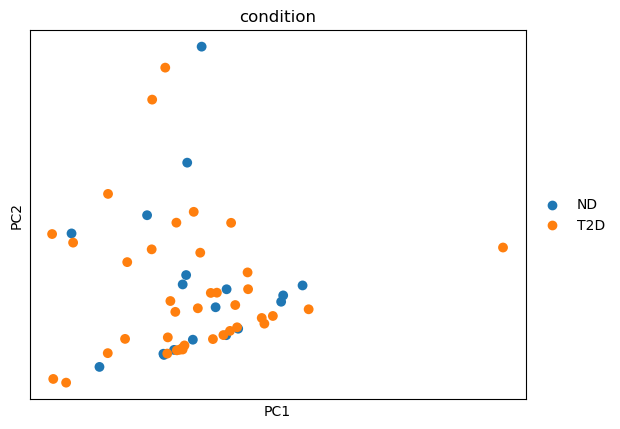

In [130]:
import scanpy as sc

#PCA
sc.tl.pca(dds)
sc.pl.pca(dds, color='condition',size=200)

In [131]:
#GSEA
import gseapy as gp
from gseapy.plot import gseaplot

In [132]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000003,375.148223,0.475054,0.183527,2.588465,0.009640,0.070969,TSPAN6
ENSG00000000419,627.071293,-0.138187,0.111289,-1.241687,0.214352,0.436885,DPM1
ENSG00000000457,239.486469,-0.134296,0.104067,-1.290477,0.196885,0.414821,SCYL3
ENSG00000000460,52.847949,-0.436018,0.212865,-2.048329,0.040528,0.162894,C1orf112
ENSG00000000938,16.922048,1.126515,0.478841,2.352588,0.018643,0.103901,FGR
...,...,...,...,...,...,...,...
ENSG00000285399,16.433371,0.274723,0.260402,1.054996,0.291427,0.523200,NaN
ENSG00000285410,163.845955,0.253172,0.130227,1.944085,0.051885,0.188804,GABPB1-IT1
ENSG00000285417,11.783023,0.740980,0.331409,2.235847,0.025362,0.123790,NaN
ENSG00000285437,16.092147,0.157802,0.290170,0.543826,0.586561,0.768621,POLR2J3


In [133]:
ranking = res[['Symbol', 'stat']].dropna().sort_values('stat', ascending = False)
ranking

,Symbol,stat
ENSG00000284653,AL357509.1,9.812582
ENSG00000050165,DKK3,8.831101
ENSG00000069424,KCNAB2,8.312214
ENSG00000170509,HSD17B13,7.910476
ENSG00000175785,PRIMA1,7.760276
...,...,...
ENSG00000163581,SLC2A2,-7.524283
ENSG00000145907,G3BP1,-7.677875
ENSG00000127870,RNF6,-7.743882
ENSG00000147003,CLTRN,-7.998483


In [134]:
ranking=ranking.drop_duplicates('Symbol') #elimina els symbols duplicats
ranking

,Symbol,stat
ENSG00000284653,AL357509.1,9.812582
ENSG00000050165,DKK3,8.831101
ENSG00000069424,KCNAB2,8.312214
ENSG00000170509,HSD17B13,7.910476
ENSG00000175785,PRIMA1,7.760276
...,...,...
ENSG00000163581,SLC2A2,-7.524283
ENSG00000145907,G3BP1,-7.677875
ENSG00000127870,RNF6,-7.743882
ENSG00000147003,CLTRN,-7.998483


In [135]:
manual_set = {'things':['ARG2','CLTRN','RNF6','G3BP1','SLC2A2']}
manual_set

{'things': ['ARG2', 'CLTRN', 'RNF6', 'G3BP1', 'SLC2A2']}

In [136]:
gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbatio

In [180]:
import gseapy as gp

# Realiza el análisis de enriquecimiento de genes
pre_res = gp.prerank(rnk=ranking.reset_index(drop=True),
                     gene_sets=['Reactome_2022', manual_set],
                     seed=6, permutation_num=100)



In [181]:
out=[]

for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes']])
out_df=pd.DataFrame(out, columns=['Term','fdr','es','nes']).sort_values('fdr').reset_index(drop=True)
out_df

#fdr= p_value corrected
#es=enrichment score
#nes= normalized enrichment score

,Term,fdr,es,nes
0,Reactome_2022__APC/C-mediated Degradation Of Cell Cycle Proteins R-HSA-174143,0.000000,-0.550871,-2.421300
1,Reactome_2022__G2/M Checkpoints R-HSA-69481,0.000000,-0.479720,-2.273641
2,Reactome_2022__CDK-mediated Phosphorylation And Removal Of Cdc6 R-HSA-69017,0.000000,-0.575969,-2.486327
3,Reactome_2022__Collagen Formation R-HSA-1474290,0.000000,0.689758,2.868376
4,Reactome_2022__Protein Localization R-HSA-9609507,0.000000,-0.498536,-2.642262
...,...,...,...,...
1065,"Reactome_2022__Transport Of Vitamins, Nucleosides, And Related Molecules R-HSA-425397",0.995365,0.161488,0.588217
1066,Reactome_2022__Regulation Of FZD By Ubiquitination R-HSA-4641263,0.997669,-0.173328,-0.535920
1067,Reactome_2022__Activated PKN1 Stimulates Transcription Of Androgen Receptor Regulated KLK2 And KLK3 R-HSA-5625886,0.999228,-0.131697,-0.453758
1068,Reactome_2022__DNA Methylation R-HSA-5334118,0.999551,0.134807,0.405777


In [182]:
print(out_df.head(20))

                                                                                                                   Term  \
0                                         Reactome_2022__APC/C-mediated Degradation Of Cell Cycle Proteins R-HSA-174143   
1                                                                           Reactome_2022__G2/M Checkpoints R-HSA-69481   
2                                           Reactome_2022__CDK-mediated Phosphorylation And Removal Of Cdc6 R-HSA-69017   
3                                                                       Reactome_2022__Collagen Formation R-HSA-1474290   
4                                                                     Reactome_2022__Protein Localization R-HSA-9609507   
5                                                                                 Reactome_2022__Glycolysis R-HSA-70171   
6                                                                Reactome_2022__Mitochondrial Translation R-HSA-5368287   
7               

In [183]:
nes=out_df.sort_values('nes')
print(nes.head(20))

                                                                                                  Term  \
84                        Reactome_2022__Regulation Of HSF1-mediated Heat Shock Response R-HSA-3371453   
71                                            Reactome_2022__Metabolism Of Non-Coding RNA R-HSA-194441   
72                                                              Reactome_2022__Translation R-HSA-72766   
6                                               Reactome_2022__Mitochondrial Translation R-HSA-5368287   
60                     Reactome_2022__GSK3B And BTRC:CUL1-mediated-degradation Of NFE2L2 R-HSA-9762114   
26                                   Reactome_2022__Mitochondrial Translation Elongation R-HSA-5389840   
30                                           Reactome_2022__Viral Messenger RNA Synthesis R-HSA-168325   
52                                       Reactome_2022__Cellular Response To Heat Stress R-HSA-3371556   
131                                  Reactome_

In [144]:
import numpy as np
import seaborn as sns

In [145]:
dds.layers['normed_counts']

array([[185.078119  ,   0.        , 686.1672816 , ...,   0.        ,
          0.        ,   1.96891616],
       [226.23232466,   0.        , 679.83956147, ...,   5.71293749,
          0.        ,   0.        ],
       [385.25980192,   0.        , 564.97282906, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [830.58181253,   0.        , 560.12100121, ...,   0.        ,
          0.        ,   7.51280031],
       [677.76949559,   0.        , 594.67756223, ...,   1.6292536 ,
          0.        ,   8.14626798],
       [201.52933562,   1.56832168, 465.00737752, ...,   9.40993007,
          0.        ,  10.19409091]])

In [146]:
dds.layers['log1p']=np.log1p(dds.layers['normed_counts'])
dds

AnnData object with n_obs × n_vars = 57 × 49681
    obs: 'condition'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'refitted', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks', 'replace_cooks', 'log1p'

In [147]:
dds_sigs=dds[:, sigs.index]
dds_sigs.obs

,condition
Sample,
ND_counts,ND
ND_counts.1,ND
ND_counts.2,ND
ND_counts.3,ND
ND_counts.4,ND
ND_counts.5,ND
ND_counts.6,ND
ND_counts.7,ND
ND_counts.8,ND


In [148]:
grapher=pd.DataFrame(dds_sigs.layers['log1p'].T,
                    index=dds_sigs.var_names, columns=dds_sigs.obs_names) #dataframe con los valores filtrados de mayor expression i con los valores transformados a log +1.
grapher

Sample,ND_counts,ND_counts.1,ND_counts.2,ND_counts.3,ND_counts.4,ND_counts.5,ND_counts.6,ND_counts.7,ND_counts.8,ND_counts.9,...,T2D_counts.29,T2D_counts.30,T2D_counts.31,T2D_counts.32,T2D_counts.33,T2D_counts.34,T2D_counts.35,T2D_counts.36,T2D_counts.37,T2D_counts.38
ENSG00000000971,3.386060,4.936293,6.275051,3.046967,4.100839,5.122372,5.338889,1.285386,2.028298,2.981296,...,6.499413,5.760638,6.428937,5.810919,6.652181,5.390417,5.955200,6.509229,5.673348,6.531397
ENSG00000002726,2.065749,2.316557,2.046303,0.000000,3.034808,0.000000,2.297808,2.704868,3.182377,1.301100,...,4.347074,3.038621,2.573723,2.646264,0.672762,3.750303,2.159225,2.038365,1.902464,2.814403
ENSG00000002933,6.117768,6.279357,5.553790,6.454680,6.439381,6.112033,6.484955,7.440256,6.193352,6.792593,...,7.281642,6.976018,6.811515,6.789875,7.782868,7.435556,5.728725,7.228034,7.234080,6.821853
ENSG00000003096,1.088197,3.218649,4.084408,3.393481,4.531680,3.355528,3.166537,3.854757,3.526528,2.981296,...,4.189555,4.002595,4.214052,3.733974,4.554350,5.059279,4.556740,5.190942,4.656550,3.591466
ENSG00000004059,6.270364,6.432015,6.117331,6.347664,6.576377,5.527377,6.466926,6.743593,6.892205,7.070952,...,6.200104,6.556831,5.847204,5.974489,5.912158,6.038438,5.645626,5.855339,5.801888,5.871150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000282961,2.624520,3.867989,2.407743,3.650331,3.469153,2.643477,3.375343,2.360121,3.526528,2.199445,...,2.506236,2.965485,3.583452,4.125234,3.292511,2.800599,3.209218,3.351550,3.788164,3.501061
ENSG00000283959,3.511161,3.937181,3.696655,3.235158,3.703619,3.504682,3.728818,3.200491,4.204862,4.045506,...,4.048187,4.152204,4.120220,4.545952,3.648736,3.400437,4.580588,3.917022,3.711539,4.281635
ENSG00000284653,0.000000,0.000000,0.000000,2.076236,0.000000,0.000000,1.491377,0.000000,0.000000,0.000000,...,0.704838,4.128773,4.183743,3.805055,3.051758,0.000000,4.437251,3.193482,3.824382,5.147187
ENSG00000284691,2.875584,2.832991,3.942441,3.716076,0.881314,3.481317,3.250029,4.008520,2.862363,3.108467,...,2.912340,3.340672,3.620163,4.537741,3.515354,4.155501,3.569248,3.981355,3.769551,4.611037


C:\Users\NOE\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
C:\Users\NOE\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


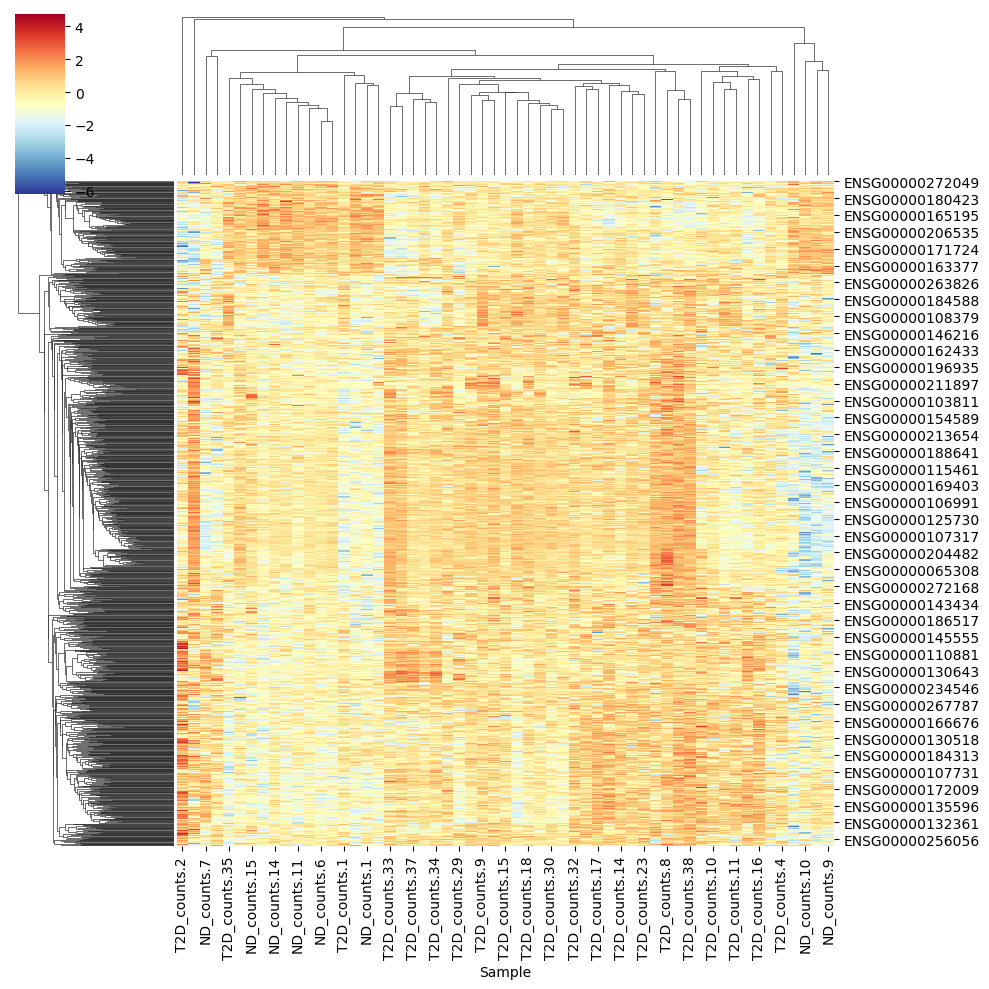

In [150]:
sns.clustermap(grapher, z_score=0, cmap='RdYlBu_r')

C:\Users\NOE\anaconda3\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1400x1000 with 0 Axes>

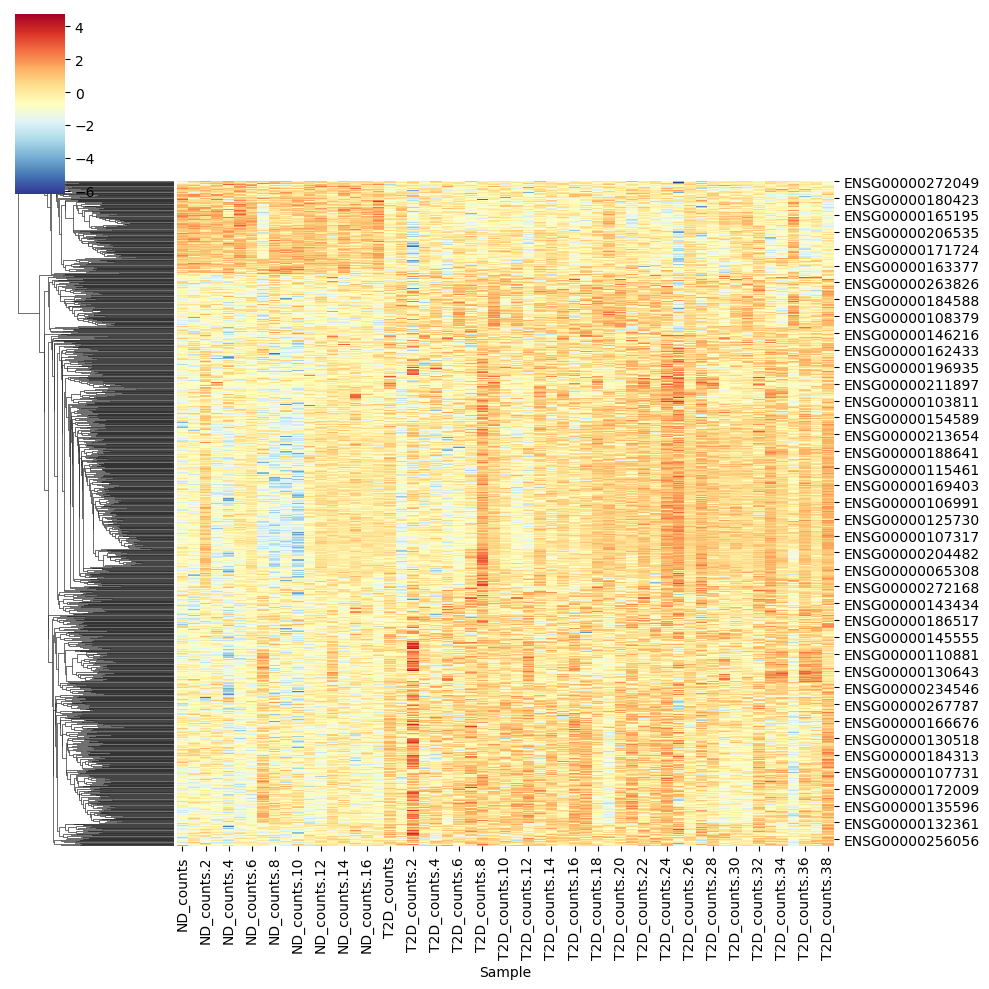

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reorganizar las muestras
nd_samples = [col for col in grapher.columns if "ND" in col]
t2d_samples = [col for col in grapher.columns if "T2D" in col]

ordered_columns = nd_samples + t2d_samples

grapher_ordered = grapher[ordered_columns]

# Crear el clustermap utilizando seaborn
plt.figure(figsize=(14, 10))
sns.clustermap(grapher_ordered, z_score=0, cmap="RdYlBu_r", col_cluster=False)

plt.show()



In [160]:
#VolcanoPlot:
from sanbomics.plots import volcano

In [161]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
ENSG00000000003,375.148223,0.475054,0.183527,2.588465,0.009640,0.070969,TSPAN6
ENSG00000000419,627.071293,-0.138187,0.111289,-1.241687,0.214352,0.436885,DPM1
ENSG00000000457,239.486469,-0.134296,0.104067,-1.290477,0.196885,0.414821,SCYL3
ENSG00000000460,52.847949,-0.436018,0.212865,-2.048329,0.040528,0.162894,C1orf112
ENSG00000000938,16.922048,1.126515,0.478841,2.352588,0.018643,0.103901,FGR
...,...,...,...,...,...,...,...
ENSG00000285399,16.433371,0.274723,0.260402,1.054996,0.291427,0.523200,NaN
ENSG00000285410,163.845955,0.253172,0.130227,1.944085,0.051885,0.188804,GABPB1-IT1
ENSG00000285417,11.783023,0.740980,0.331409,2.235847,0.025362,0.123790,NaN
ENSG00000285437,16.092147,0.157802,0.290170,0.543826,0.586561,0.768621,POLR2J3


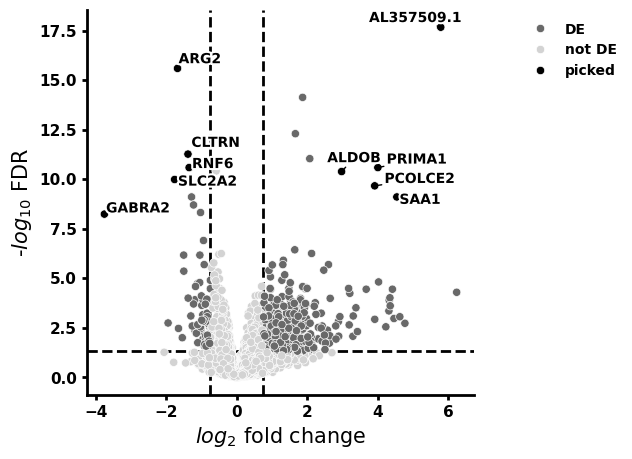

In [162]:
volcano(res, symbol='Symbol')

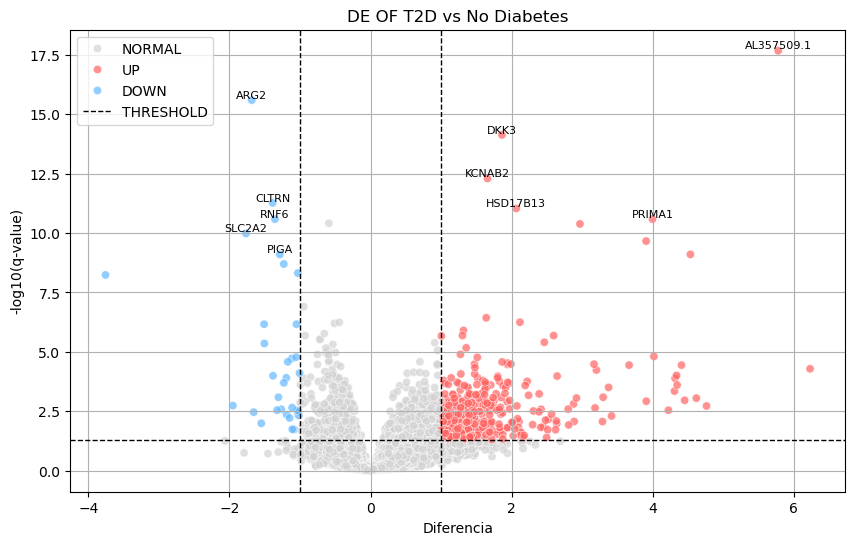

In [179]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Datos
t_results = pd.DataFrame({
    'gen': res['Symbol'],
    'p_value': res['pvalue'],
    'q_value': res['padj'],
    'LogFC': res['log2FoldChange']
})

t_results['sign'] = 'NORMAL'
for idx, row in t_results.iterrows():
    if row['q_value'] < 0.05 and row['LogFC'] > 1:
        t_results.loc[idx, 'sign'] = 'UP'
    elif row['q_value'] < 0.05 and row['LogFC'] < -1:
        t_results.loc[idx, 'sign'] = 'DOWN'

t_sign = t_results[t_results['sign'] != 'NORMAL']

# Crear el Volcano Plot
plt.figure(figsize=(10, 6))
colors = {"NORMAL": "#D2D2D2", "UP": "#FF6462", "DOWN": "#62B8FF"}

sns.scatterplot(x=t_results['LogFC'], y=-np.log10(t_results['q_value']), hue=t_results['sign'], palette=colors, alpha=0.7)
plt.axhline(-np.log10(0.05), color='k', linestyle='--', linewidth=1, label='THRESHOLD')
plt.axvline(1, color='k', linestyle='--', linewidth=1)
plt.axvline(-1, color='k', linestyle='--', linewidth=1)

# Etiquetas y título
plt.xlabel('Diferencia')
plt.ylabel('-log10(q-value)')
plt.title('DE OF T2D vs No Diabetes')
plt.legend()
plt.grid(True)

# Filtrar los genes UP más significativos
up_genes = t_results[t_results['sign'] == 'UP'].nsmallest(5, 'q_value')

for idx, row in up_genes.iterrows():
    plt.text(row['LogFC'], -np.log10(row['q_value']), row['gen'], fontsize=8, ha='center', va='bottom')

# Filtrar los genes DOWN más significativos
down_genes = t_results[t_results['sign'] == 'DOWN'].nsmallest(5, 'q_value')

for idx, row in down_genes.iterrows():
    plt.text(row['LogFC'], -np.log10(row['q_value']), row['gen'], fontsize=8, ha='center', va='bottom')

plt.show()

